### CS4423 - Networks
Angela Carnevale <br />
School of Mathematical and Statistical Sciences<br />
NUI Galway

# Assignment 1

Provide answers to the problems in the boxes provided. 

The buttons at the top of the page can be used to **create
more boxes if needed**.
The type of box can be changed from `Code` to `Markdown`.
* `Code` boxes take (and execute) `python` code.
* `Markdown` boxes take (and format nicely) **text input**.
In this way, you can provide answers, ask questions, 
or raise issues, in words.

When finished, print this notebook into a **pdf** file and submit this to
**blackboard**.

**Deadline** is Wednesday 16 February at 9am.

## Setup

This is a `jupyter` notebook.   You can open it and interact with it
on [![Open in Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/angelacarnevale/2122-CS4423-Networks/HEAD)

Or, you can
install and use `jupyter` as a `python` package on your own laptop or PC.  

The following command loads the `networkx` package into the current session.  
The next command specifies some standard options that can be useful for drawing graphs.  

* In order to execute the code in a box,
use the mouse or arrow keys to highlight the box and then press SHIFT-RETURN.

* To write text in a Markdown cell, simply double-click on it. When you are done, press SHIFT-RETURN.

In [1]:
import networkx as nx
opts = { "with_labels": True, "node_color": 'y' }

Should it ever happen that the notebook becomes unusable, start again with a fresh copy.

##  1. Warmup.

The purpose of this task is to get you used to working with the `networkx` package
in the `jupyter` notebook environment.

1. Define a new (simple) graph `G` on the vertex set $X = \{0, 1, 2, 3, 4, 5, 6, 7, 8, 9\}$
with edges $0-1$, $1-2$, $2-3$, $3-4$, $4-5$, $5-6$, $6-7$, $7-8$, $8-9$, and $9-0$.
Draw the graph.  Hence or otherwise determine its **order** (the number of nodes)
and its **size** (the number of links).

In [2]:
G = nx.Graph(['01','12','23','34','45','56','67','78','89','90'])
G

In [3]:
G.order()

10

In [4]:
G.size()

10

... you can write your comments in this box ...

2. Find the **adjacency matrix** $A$ of the graph `G`.  Then compute its square, $A^2$,
and draw the graph `G2` that has $A^2$ as its adjacency matrix.  What are the connected components of `G2`? 

In [5]:
#getting adjacency matrix and converting it  to array
A = nx.adjacency_matrix(G).toarray()

In [6]:
#squaring our adjacency matrix and printing it out
AA = A@A
print(AA)

[[2 0 1 0 0 0 0 0 1 0]
 [0 2 0 1 0 0 0 0 0 1]
 [1 0 2 0 1 0 0 0 0 0]
 [0 1 0 2 0 1 0 0 0 0]
 [0 0 1 0 2 0 1 0 0 0]
 [0 0 0 1 0 2 0 1 0 0]
 [0 0 0 0 1 0 2 0 1 0]
 [0 0 0 0 0 1 0 2 0 1]
 [1 0 0 0 0 0 1 0 2 0]
 [0 1 0 0 0 0 0 1 0 2]]


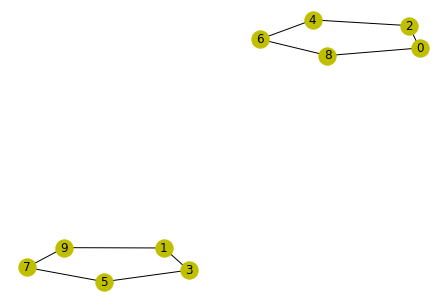

In [7]:
import numpy as np
#if value in matrix >1 we set that value =1
AA[AA>1] = 1

#We then add 0's to the diagonal of the matrix
np.fill_diagonal(AA,0)

#Drawing graph
G2 = nx.from_numpy_matrix(AA)
nx.draw(G2, **opts)

The connected components of the above graphs are the nodes sets: {0,2,4,6,8}, {1,3,5,7,9}

##  2.  Projections

Suppose that $G$ is a bipartite graph on a vertex set that is the disjoint union of two sets $X$ and $Y$, where each edge
connects a vertex in $X$ to a vertex in $Y$.  The **projection** of $G$ onto the set $X$
is the graph with vertex set $X$, where any two elements are joined by an edge whenever
they are joined to a common element $y \in Y$ in the graph $G$.  
The adjacency matrix of the projection can be derived from the square $A^2$ of the adjacency matrix
$A$ of $G$.

Consider the affilliation network below, with $11$ people labelled $A$ to $K$,
and four foci ("focal points" of interaction) labelled $1$, $2$, $3$ and $4$, 

![bipartite graph](images/bipartite.png)

1.  Compute the adjacency matrix of $G$.

2. Draw the projection on (just)
   the people, in which two people are joined by an edge if they have a common
   focus.
   (Of course, one can do this easily by hand.  It would be nice to get
   `networkx` to do it for you.)

3. Compute the adjacency matrix $B$ of the projection
   and compare it to $A^2$.  What do you observe?

### Question 1

In [8]:
BG = nx.Graph(['A1','B1','C1','D1','B2','D2','E2','F2','G2','E3','F3','H3','I3','G4','J4','K4'])

#Relabel nodes
BG = nx.relabel_nodes(BG, {'1':0,'2':1,'3':2,'4':3})
BG = nx.relabel_nodes(BG, {'A':5,'B':6,'C':7,'D':8,'E':9,'F':10,'G':11,'H':12,'I':13,'J':14,'K':15})

H=nx.Graph()
H.add_nodes_from(range(4))
H.add_nodes_from(range(5,16))
H.add_edges_from(BG.edges())
AA = nx.adjacency_matrix(H)

with np.printoptions(threshold=9999):
    print(AA.toarray())

[[0 0 0 0 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]]


### Question 2

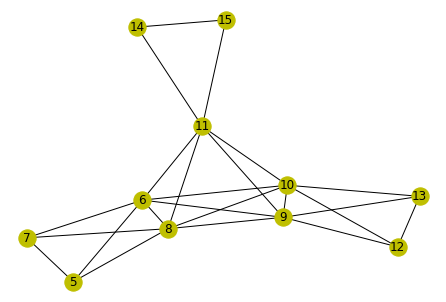

In [12]:

#Relabel nodes
BG = nx.relabel_nodes(BG, {'1':0,'2':1,'3':2,'4':3})
BG = nx.relabel_nodes(BG, {'A':5,'B':6,'C':7,'D':8,'E':9,'F':10,'G':11,'H':12,'I':13,'J':14,'K':15})

H=nx.Graph()
H.add_nodes_from(range(4))
H.add_nodes_from(range(5,16))
H.add_edges_from(BG.edges())

X, Y = [i for i in range(4)], [i for i in range(5,16)]
XX = nx.projected_graph(H, Y)
nx.draw(XX, **opts)

### Question 3

In [13]:
#Adjacency matrix of projection
C = nx.bipartite.biadjacency_matrix(H,X,Y)
C*C.transpose().toarray()

array([[4, 2, 0, 0],
       [2, 5, 2, 1],
       [0, 2, 4, 0],
       [0, 1, 0, 3]], dtype=int32)

In [14]:
A = nx.adjacency_matrix(H)
AA = A.toarray() @ A.toarray()
AA

array([[4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [2, 5, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 2, 2, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 2, 2, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 2, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1]], dtype=int32)

As we can see our adjacency matrix for the projection represents the top left of our adjacency matrix for $A^2$. This represents the adjacency matrix of the projection onto the vertex set $X$. The bottom right of the adjacency matrix of $A^2$ represents the adjacency matrix of the projection onto the vertex set Y.

## 3. Random Trees

The `nx.random_tree(n)` command can be used to generate a random tree on the `n` vertices
represented in `python` by `range(n)` (in order).

Such a tree can be converted into a sequence of $n - 2$ numbers, its **Prüfer code** by the
`python` function `pruefer_code`, defined as follows:

In [15]:
def pruefer_node(tree):
    for x in tree:
        if tree.degree(x) == 1:
            for y in tree[x]:
                tree.remove_node(x)
                return y

def pruefer_code(T):
    tree = T.copy()
    return [pruefer_node(tree) for k in range(tree.order() - 2)]

In [16]:
T = nx.random_tree(12)

In [17]:
code = pruefer_code(T)
code

[6, 4, 9, 1, 7, 10, 9, 11, 5, 10]

Conversely, the following function `tree_pruefer` constructs a tree from a
Prüfer code.

In [18]:
def tree_pruefer(code):

    # initialize graph and defects
    n = len(code) + 2
    tree = nx.empty_graph(n)
    degrees = [1 for x in tree]
    for y in code:
        degrees[y] += 1
        
    # add edges
    for y in code:
        for x in tree:
            if degrees[x] == 1:
                tree.add_edge(x, y)
                for z in (x, y):
                    degrees[z] -= 1
                break
                
    # final edge
    e = [x for x in tree if degrees[x] == 1]
    tree.add_edge(*e)
    
    return tree

In [19]:
T2 = tree_pruefer(code)

1. Construct random trees on $n = 10, 11, 12$ nodes (one each is enough).  For each such tree,
   draw it, compute its Prüfer code and then convert the code back into a tree.
   Do you get your old tree back?



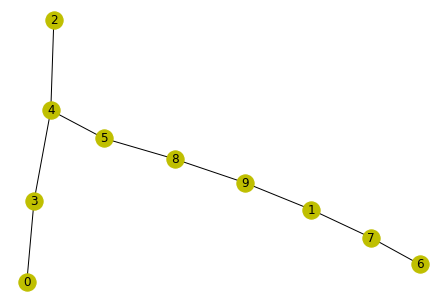

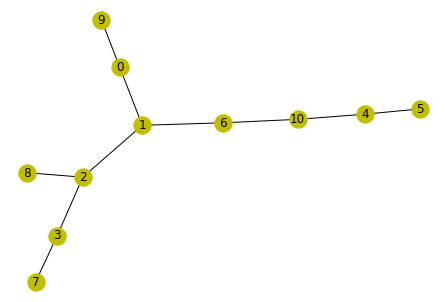

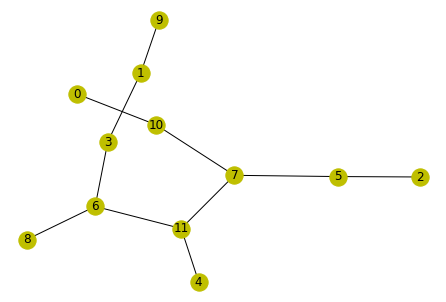

In [20]:
#Initialize and plot each of the graphs
import matplotlib.pyplot as plt
plt.figure(1)
rt1 = nx.random_tree(10)
nx.draw(rt1,**opts)

plt.figure(2)
rt2 = nx.random_tree(11)
nx.draw(rt2,**opts)

plt.figure(3)
rt3 = nx.random_tree(12)
nx.draw(rt3,**opts)
plt.show()

In [21]:
#Computing Prufer code
pt1 = pruefer_code(rt1)
pt2 = pruefer_code(rt2)
pt3 = pruefer_code(rt3)
print(pt1)
print(pt2)
print(pt3)

[3, 4, 4, 5, 8, 7, 1, 9]
[4, 10, 3, 2, 2, 1, 0, 1, 6]
[10, 5, 11, 7, 6, 1, 3, 6, 11, 7]


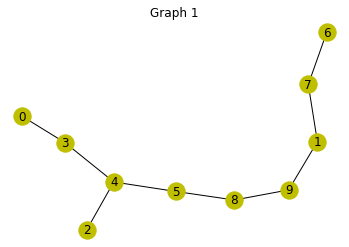

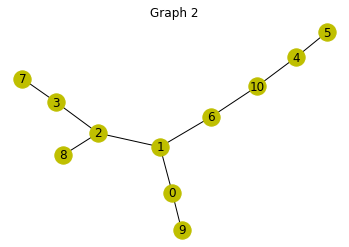

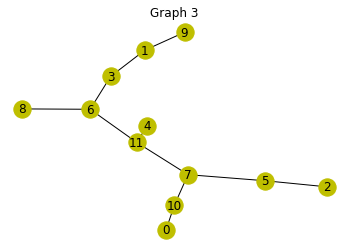

In [22]:
plt.figure(1)
plt.title('Graph 1')
nx.draw(tree_pruefer(pt1),**opts)

plt.figure(2)
plt.title('Graph 2')
nx.draw(tree_pruefer(pt2),**opts)

plt.figure(3)
plt.title('Graph 3')
nx.draw(tree_pruefer(pt3),**opts)
plt.show()

Yes we get our old tree back.

2. For a few randomly chosen Prüfer codes, construct the corresponding tree, 
   draw it if you want, and convert it back into a Prüfer code.
   Do you get your old code back?

In [23]:
#Randomly creating Prufer codes
pc1 = [2,6,9,5,3,7,8,7,6,5]
pc2 = [5,8,0,9,1,2,5,8]
pc3 = [0,7,8,3,2,1,3,4,6]

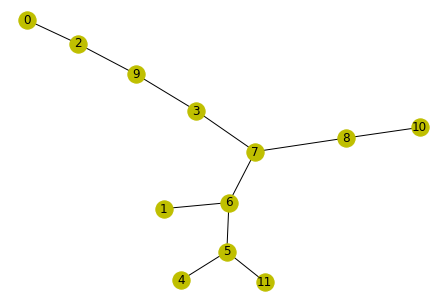

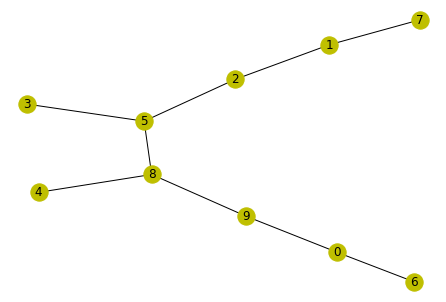

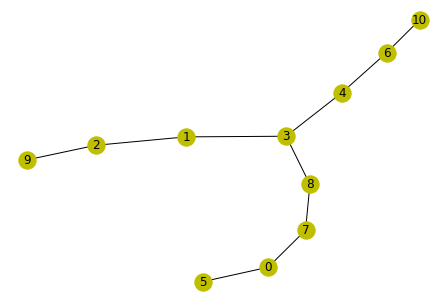

In [24]:
#Constructing the corresponding trees
plt.figure(1)
nx.draw(tree_pruefer(pc1),**opts)
plt.figure(2)
nx.draw(tree_pruefer(pc2),**opts)
plt.figure(3)
nx.draw(tree_pruefer(pc3),**opts)
plt.show()

In [25]:
print(pruefer_code(tree_pruefer(pc1)))
print(pruefer_code(tree_pruefer(pc2)))
print(pruefer_code(tree_pruefer(pc3)))

[2, 6, 9, 5, 3, 7, 8, 7, 6, 5]
[5, 8, 0, 9, 1, 2, 5, 8]
[0, 7, 8, 3, 2, 1, 3, 4, 6]


Yes we have got our Prufer code back. 

3. Which tree on $n$ nodes corresponds to the Prüfer code 
   consisting of $n-2$ entries $0$?

A star graph $S_n$ of order n corresponds to the Pruefer code consisting of n-2 entries 0. 

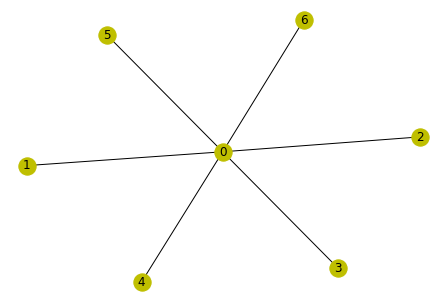

In [27]:
nx.draw(tree_pruefer([0,0,0,0,0]),**opts)

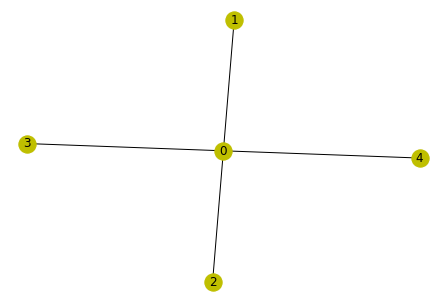

In [28]:
nx.draw(tree_pruefer([0,0,0]),**opts)

In [2]:
export PATH=/Library/TeX/texbin:$PATH

SyntaxError: invalid syntax (<ipython-input-2-c2a3b71f4a9e>, line 1)